# handle Time Series Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tsdb = pd.read_csv('timeseries.csv')
tsdb 

,Date,A,B,C,D,E,F,G
0,3/18/2008,24.68,164.93,114.73,26.27,19.21,28.87,63.44
1,3/19/2008,24.18,164.89,114.75,26.22,19.07,27.76,59.98
2,3/20/2008,23.99,164.63,115.04,25.78,19.01,27.04,59.61
3,3/25/2008,24.14,163.92,114.85,27.41,19.61,27.84,59.41
4,3/26/2008,24.44,163.45,114.84,26.86,19.53,28.02,60.09
5,3/27/2008,24.38,163.46,115.40,27.09,19.72,28.25,59.62
6,3/28/2008,24.32,163.22,115.56,27.13,19.63,28.24,58.65
7,3/31/2008,24.19,164.02,115.54,26.74,19.55,28.43,59.20
8,4/1/2008,23.81,163.59,115.72,27.82,20.21,29.17,56.18
9,4/2/2008,24.03,163.32,115.11,28.22,20.42,29.38,56.64


In [4]:
tsdb =tsdb.rename(columns={'Date':'datetime'})
tsdb['datetime'] = pd.to_datetime(tsdb['datetime'])
tsdb

,datetime,A,B,C,D,E,F,G
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09
5,2008-03-27,24.38,163.46,115.40,27.09,19.72,28.25,59.62
6,2008-03-28,24.32,163.22,115.56,27.13,19.63,28.24,58.65
7,2008-03-31,24.19,164.02,115.54,26.74,19.55,28.43,59.20
8,2008-04-01,23.81,163.59,115.72,27.82,20.21,29.17,56.18
9,2008-04-02,24.03,163.32,115.11,28.22,20.42,29.38,56.64


In [7]:
min = tsdb['datetime'].min()
max = tsdb['datetime'].max()
l = max - min
l

Timedelta('16 days 00:00:00')

In [9]:
tsdb['month']  = tsdb['datetime'].dt.month
tsdb

,datetime,A,B,C,D,E,F,G,month
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44,3
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98,3
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61,3
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41,3
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09,3
5,2008-03-27,24.38,163.46,115.40,27.09,19.72,28.25,59.62,3
6,2008-03-28,24.32,163.22,115.56,27.13,19.63,28.24,58.65,3
7,2008-03-31,24.19,164.02,115.54,26.74,19.55,28.43,59.20,3
8,2008-04-01,23.81,163.59,115.72,27.82,20.21,29.17,56.18,4
9,2008-04-02,24.03,163.32,115.11,28.22,20.42,29.38,56.64,4


<Axes: xlabel='datetime', ylabel='TSDB'>

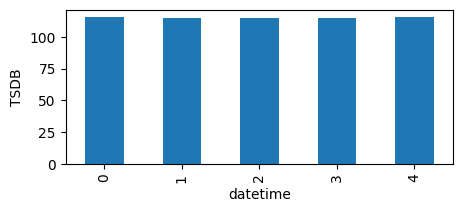

In [24]:
fig , axs = plt.subplots(figsize = (5,2))
plt.xlabel('time')
plt.ylabel('TSDB')
tsdb.groupby([tsdb['datetime'].dt.weekday])['C'].mean().plot(kind='bar',ax= axs)

In [25]:
tsdb.pivot(index='datetime', columns='A',values='B')

A,23.81,23.99,24.03,24.14,24.18,24.19,24.32,24.34,24.38,24.44,24.68
datetime,,,,,,,,,,,
2008-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.93
2008-03-19,NaN,NaN,NaN,NaN,164.89,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-20,NaN,164.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-25,NaN,NaN,NaN,163.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.45,NaN
2008-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.46,NaN,NaN
2008-03-28,NaN,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN
2008-03-31,NaN,NaN,NaN,NaN,NaN,164.02,NaN,NaN,NaN,NaN,NaN
2008-04-01,163.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
